In [1]:
# ANALYSIS BY OLUWADAMILARE TOBILOBA

import numpy as np       
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Timestamp
import warnings 
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio
import sklearn
import plotly.express as ex
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("C:/Users/Biggest/Downloads/SHG_Booking_Data.xlsx")

In [3]:
data

Booking ID   Hotel Booking Date Arrival Date  Lead Time  Nights  \
0                1  Resort   2014-07-24   2015-07-01        342       0   
1                2  Resort   2013-06-24   2015-07-01        737       0   
2                3  Resort   2015-06-24   2015-07-01          7       1   
3                4  Resort   2015-06-18   2015-07-01         13       1   
4                5  Resort   2015-06-17   2015-07-01         14       2   
...            ...     ...          ...          ...        ...     ...   
119385      119386    City   2017-08-07   2017-08-30         23       7   
119386      119387    City   2017-05-21   2017-08-31        102       7   
119387      119388    City   2017-07-28   2017-08-31         34       7   
119388      119389    City   2017-05-14   2017-08-31        109       7   
119389      119390    City   2017-02-05   2017-08-29        205       9   

        Guests  Distribution Channel Customer Type         Country  \
0            2                Direct     Transient        Portugal   
1            2                Direct     Transient        Portugal   
2            1                Direct     Transient  United Kingdom   
3            1             Corporate     Transient  United Kingdom   
4            2   Online Travel Agent     Transient  United Kingdom   
...        ...                   ...           ...             ...   
119385       2  Offline Travel Agent     Transient         Belgium   
119386       3   Online Travel Agent     Transient          France   
119387       2   Online Travel Agent     Transient         Germany   
119388       2   Online Travel Agent     Transient  United Kingdom   
119389       2   Online Travel Agent     Transient         Germany   

       Deposit Type  Avg Daily Rate     Status Status Update  Cancelled (0/1)  \
0        No Deposit            0.00  Check-Out    2015-07-01                0   
1        No Deposit            0.00  Check-Out    2015-07-01                0   
2        No Deposit           75.00  Check-Out    2015-07-02                0   
3        No Deposit           75.00  Check-Out    2015-07-02                0   
4        No Deposit           98.00  Check-Out    2015-07-03                0   
...             ...             ...        ...           ...              ...   
119385   No Deposit           96.14  Check-Out    2017-09-06                0   
119386   No Deposit          225.43  Check-Out    2017-09-07                0   
119387   No Deposit          157.71  Check-Out    2017-09-07                0   
119388   No Deposit          104.40  Check-Out    2017-09-07                0   
119389   No Deposit          151.20  Check-Out    2017-09-07                0   

        Revenue  Revenue Loss  
0          0.00           0.0  
1          0.00           0.0  
2         75.00           0.0  
3         75.00           0.0  
4        196.00           0.0  
...         ...           ...  
119385   672.98           0.0  
119386  1578.01           0.0  
119387  1103.97           0.0  
119388   730.80           0.0  
119389  1360.80           0.0  

[119390 rows x 17 columns]

# Data Interaction

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Booking ID            119390 non-null  int64         
 1   Hotel                 119390 non-null  object        
 2   Booking Date          119390 non-null  datetime64[ns]
 3   Arrival Date          119390 non-null  datetime64[ns]
 4   Lead Time             119390 non-null  int64         
 5   Nights                119390 non-null  int64         
 6   Guests                119390 non-null  int64         
 7   Distribution Channel  119390 non-null  object        
 8   Customer Type         119390 non-null  object        
 9   Country               118902 non-null  object        
 10  Deposit Type          119390 non-null  object        
 11  Avg Daily Rate        119390 non-null  float64       
 12  Status                119390 non-null  object        
 13 

In [5]:
data.nunique()

Booking ID              119390
Hotel                        2
Booking Date               984
Arrival Date               793
Lead Time                  479
Nights                      45
Guests                      15
Distribution Channel         5
Customer Type                4
Country                    174
Deposit Type                 3
Avg Daily Rate            8879
Status                       3
Status Update              926
Cancelled (0/1)              2
Revenue                  12126
Revenue Loss              5856
dtype: int64

# Handling Null values

In [6]:
data.isnull().sum()

Booking ID                0
Hotel                     0
Booking Date              0
Arrival Date              0
Lead Time                 0
Nights                    0
Guests                    0
Distribution Channel      0
Customer Type             0
Country                 488
Deposit Type              0
Avg Daily Rate            0
Status                    0
Status Update             0
Cancelled (0/1)           0
Revenue                   0
Revenue Loss              0
dtype: int64

In [7]:
#Checking percentage of null values

(data.isnull().sum()/(len(data)))*100

Booking ID              0.000000
Hotel                   0.000000
Booking Date            0.000000
Arrival Date            0.000000
Lead Time               0.000000
Nights                  0.000000
Guests                  0.000000
Distribution Channel    0.000000
Customer Type           0.000000
Country                 0.408744
Deposit Type            0.000000
Avg Daily Rate          0.000000
Status                  0.000000
Status Update           0.000000
Cancelled (0/1)         0.000000
Revenue                 0.000000
Revenue Loss            0.000000
dtype: float64

In [8]:
data.isnull().sum().max()

488

In [9]:
#Dropping Null values

data = data.dropna()

In [10]:
#rechecking for null values
data.isnull().sum()

Booking ID              0
Hotel                   0
Booking Date            0
Arrival Date            0
Lead Time               0
Nights                  0
Guests                  0
Distribution Channel    0
Customer Type           0
Country                 0
Deposit Type            0
Avg Daily Rate          0
Status                  0
Status Update           0
Cancelled (0/1)         0
Revenue                 0
Revenue Loss            0
dtype: int64

In [11]:
data['Revenue'].describe()

count    118902.000000
mean        248.192392
std         299.556692
min         -63.800000
25%           0.000000
50%         178.000000
75%         344.000000
max        5400.000000
Name: Revenue, dtype: float64

In [12]:
data['Revenue'].sum()

29510571.84999999

In [13]:
data['Revenue Loss'].sum()

-13110238.13

# Checking for entry/input error

In [14]:
data['Country'].unique()

array(['Portugal', 'United Kingdom', 'United States', 'Spain', 'Ireland',
       'France', 'Romania', 'Norway', 'Oman', 'Argentina', 'Poland',
       'Germany', 'Belgium', 'Switzerland', 'China', 'Greece', 'Italy',
       'Netherlands', 'Denmark', 'Russian Federation', 'Sweden',
       'Australia', 'Estonia', 'Czech Republic', 'Brazil', 'Finland',
       'Mozambique', 'Botswana', 'Luxembourg', 'Slovenia', 'Albania',
       'India', 'Mexico', 'Morocco', 'Ukraine', 'San Marino', 'Latvia',
       'Puerto Rico', 'Serbia', 'Chile', 'Austria', 'Belarus',
       'Lithuania', 'Turkey', 'South Africa', 'Angola', 'Israel',
       'Cayman Islands', 'Zambia', 'Cape Verde', 'Zimbabwe', 'Algeria',
       'Republic of Korea', 'Costa Rica', 'Hungary',
       'United Arab Emirates', 'Tunisia', 'Jamaica', 'Croatia',
       'Hong Kong', 'Iran', 'Georgia', 'Andorra', 'Gibraltar', 'Uruguay',
       'Jersey', 'Central African Republic', 'Cyprus', 'Colombia',
       'Guernsey', 'Kuwait', 'Nigeria', 'Maldives

In [15]:
print(data['Booking Date'].unique())
print(data['Arrival Date'].unique()) 
print(data['Status Update'].unique())

<DatetimeArray>
['2014-07-24 00:00:00', '2013-06-24 00:00:00', '2015-06-24 00:00:00',
 '2015-06-18 00:00:00', '2015-06-17 00:00:00', '2015-07-01 00:00:00',
 '2015-06-22 00:00:00', '2015-04-07 00:00:00', '2015-04-17 00:00:00',
 '2015-06-08 00:00:00',
 ...
 '2015-03-29 00:00:00', '2015-04-28 00:00:00', '2015-07-26 00:00:00',
 '2015-05-17 00:00:00', '2015-09-20 00:00:00', '2015-09-27 00:00:00',
 '2015-01-20 00:00:00', '2015-02-01 00:00:00', '2015-02-17 00:00:00',
 '2015-11-22 00:00:00']
Length: 984, dtype: datetime64[ns]
<DatetimeArray>
['2015-07-01 00:00:00', '2015-07-02 00:00:00', '2015-07-03 00:00:00',
 '2015-07-04 00:00:00', '2015-07-05 00:00:00', '2015-07-06 00:00:00',
 '2015-07-07 00:00:00', '2015-07-08 00:00:00', '2015-07-09 00:00:00',
 '2015-07-10 00:00:00',
 ...
 '2017-08-31 00:00:00', '2015-12-09 00:00:00', '2016-01-11 00:00:00',
 '2016-01-20 00:00:00', '2017-03-21 00:00:00', '2015-12-16 00:00:00',
 '2015-11-22 00:00:00', '2016-01-24 00:00:00', '2016-03-06 00:00:00',
 '2016-11-1

# DATA REDUCTION

In [17]:
data.drop(['Booking ID', 'Status Update'], axis=1, inplace = True) #dropping the 'Booking ID' colunm as it's not need for analysis

In [18]:
data

Hotel Booking Date Arrival Date  Lead Time  Nights  Guests  \
0       Resort   2014-07-24   2015-07-01        342       0       2   
1       Resort   2013-06-24   2015-07-01        737       0       2   
2       Resort   2015-06-24   2015-07-01          7       1       1   
3       Resort   2015-06-18   2015-07-01         13       1       1   
4       Resort   2015-06-17   2015-07-01         14       2       2   
...        ...          ...          ...        ...     ...     ...   
119385    City   2017-08-07   2017-08-30         23       7       2   
119386    City   2017-05-21   2017-08-31        102       7       3   
119387    City   2017-07-28   2017-08-31         34       7       2   
119388    City   2017-05-14   2017-08-31        109       7       2   
119389    City   2017-02-05   2017-08-29        205       9       2   

        Distribution Channel Customer Type         Country Deposit Type  \
0                     Direct     Transient        Portugal   No Deposit   
1                     Direct     Transient        Portugal   No Deposit   
2                     Direct     Transient  United Kingdom   No Deposit   
3                  Corporate     Transient  United Kingdom   No Deposit   
4        Online Travel Agent     Transient  United Kingdom   No Deposit   
...                      ...           ...             ...          ...   
119385  Offline Travel Agent     Transient         Belgium   No Deposit   
119386   Online Travel Agent     Transient          France   No Deposit   
119387   Online Travel Agent     Transient         Germany   No Deposit   
119388   Online Travel Agent     Transient  United Kingdom   No Deposit   
119389   Online Travel Agent     Transient         Germany   No Deposit   

        Avg Daily Rate     Status  Cancelled (0/1)  Revenue  Revenue Loss  
0                 0.00  Check-Out                0     0.00           0.0  
1                 0.00  Check-Out                0     0.00           0.0  
2                75.00  Check-Out                0    75.00           0.0  
3                75.00  Check-Out                0    75.00           0.0  
4                98.00  Check-Out                0   196.00           0.0  
...                ...        ...              ...      ...           ...  
119385           96.14  Check-Out                0   672.98           0.0  
119386          225.43  Check-Out                0  1578.01           0.0  
119387          157.71  Check-Out                0  1103.97           0.0  
119388          104.40  Check-Out                0   730.80           0.0  
119389          151.20  Check-Out                0  1360.80           0.0  

[118902 rows x 15 columns]

# FEATURE ENGINEERING

to further explore/ analyze booking date, we need to split it into Year, Month and Day

In [19]:
#Converting a timestamp colunm into string so we can extract 'Year as Yr', 'Month as Mth', 'Date as Dy'

df=data['Booking Date'].astype(str)

#extract 'Year as Booking Year', 'Month as Booking Month', 'Day as Booking Day'

data['Booking Year'] = df.apply(lambda x: x.split("-")[0])
data['Booking Month'] = df.apply(lambda x: x.split("-")[1])
data['Booking Day'] = df.apply(lambda x: x.split("-")[2])

#print our new data
data

Hotel Booking Date Arrival Date  Lead Time  Nights  Guests  \
0       Resort   2014-07-24   2015-07-01        342       0       2   
1       Resort   2013-06-24   2015-07-01        737       0       2   
2       Resort   2015-06-24   2015-07-01          7       1       1   
3       Resort   2015-06-18   2015-07-01         13       1       1   
4       Resort   2015-06-17   2015-07-01         14       2       2   
...        ...          ...          ...        ...     ...     ...   
119385    City   2017-08-07   2017-08-30         23       7       2   
119386    City   2017-05-21   2017-08-31        102       7       3   
119387    City   2017-07-28   2017-08-31         34       7       2   
119388    City   2017-05-14   2017-08-31        109       7       2   
119389    City   2017-02-05   2017-08-29        205       9       2   

        Distribution Channel Customer Type         Country Deposit Type  \
0                     Direct     Transient        Portugal   No Deposit   
1                     Direct     Transient        Portugal   No Deposit   
2                     Direct     Transient  United Kingdom   No Deposit   
3                  Corporate     Transient  United Kingdom   No Deposit   
4        Online Travel Agent     Transient  United Kingdom   No Deposit   
...                      ...           ...             ...          ...   
119385  Offline Travel Agent     Transient         Belgium   No Deposit   
119386   Online Travel Agent     Transient          France   No Deposit   
119387   Online Travel Agent     Transient         Germany   No Deposit   
119388   Online Travel Agent     Transient  United Kingdom   No Deposit   
119389   Online Travel Agent     Transient         Germany   No Deposit   

        Avg Daily Rate     Status  Cancelled (0/1)  Revenue  Revenue Loss  \
0                 0.00  Check-Out                0     0.00           0.0   
1                 0.00  Check-Out                0     0.00           0.0   
2                75.00  Check-Out                0    75.00           0.0   
3                75.00  Check-Out                0    75.00           0.0   
4                98.00  Check-Out                0   196.00           0.0   
...                ...        ...              ...      ...           ...   
119385           96.14  Check-Out                0   672.98           0.0   
119386          225.43  Check-Out                0  1578.01           0.0   
119387          157.71  Check-Out                0  1103.97           0.0   
119388          104.40  Check-Out                0   730.80           0.0   
119389          151.20  Check-Out                0  1360.80           0.0   

       Booking Year Booking Month Booking Day  
0              2014            07          24  
1              2013            06          24  
2              2015            06          24  
3              2015            06          18  
4              2015            06          17  
...             ...           ...         ...  
119385         2017            08          07  
119386         2017            05          21  
119387         2017            07          28  
119388         2017            05          14  
119389         2017            02          05  

[118902 rows x 18 columns]

In [29]:
# Convert strings back to integer

data['Booking Year'] = data['Booking Year'].astype('int')
data['Booking Month'] = data['Booking Month'].astype('int')
data['Booking Day'] = data['Booking Day'].astype('int')

In [30]:
# Checking for change in datatype

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118902 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Hotel                 118902 non-null  object        
 1   Booking Date          118902 non-null  datetime64[ns]
 2   Arrival Date          118902 non-null  datetime64[ns]
 3   Lead Time             118902 non-null  int64         
 4   Nights                118902 non-null  int64         
 5   Guests                118902 non-null  int64         
 6   Distribution Channel  118902 non-null  object        
 7   Customer Type         118902 non-null  object        
 8   Country               118902 non-null  object        
 9   Deposit Type          118902 non-null  object        
 10  Avg Daily Rate        118902 non-null  float64       
 11  Status                118902 non-null  object        
 12  Cancelled (0/1)       118902 non-null  int64         
 13  Reve

# EXPLORATORY DATA ANALYSIS [EDA]

In [31]:
data.describe(include = 'all').T

count unique                  top    freq  \
Hotel                   118902      2                 City   79306   
Booking Date            118902    NaN                  NaN     NaN   
Arrival Date            118902    NaN                  NaN     NaN   
Lead Time             118902.0    NaN                  NaN     NaN   
Nights                118902.0    NaN                  NaN     NaN   
Guests                118902.0    NaN                  NaN     NaN   
Distribution Channel    118902      5  Online Travel Agent   73991   
Customer Type           118902      4            Transient   89174   
Country                 118902    174             Portugal   48590   
Deposit Type            118902      3           No Deposit  104167   
Avg Daily Rate        118902.0    NaN                  NaN     NaN   
Status                  118902      3            Check-Out   74745   
Cancelled (0/1)       118902.0    NaN                  NaN     NaN   
Revenue               118902.0    NaN                  NaN     NaN   
Revenue Loss          118902.0    NaN                  NaN     NaN   
Booking Year          118902.0    NaN                  NaN     NaN   
Booking Month         118902.0    NaN                  NaN     NaN   
Booking Day           118902.0    NaN                  NaN     NaN   

                                               mean                  min  \
Hotel                                           NaN                  NaN   
Booking Date          2016-05-16 18:57:41.391734528  2013-06-24 00:00:00   
Arrival Date          2016-08-29 02:21:14.905384448  2015-07-01 00:00:00   
Lead Time                                104.308027                  0.0   
Nights                                     3.431027                  0.0   
Guests                                     1.970556                  0.0   
Distribution Channel                            NaN                  NaN   
Customer Type                                   NaN                  NaN   
Country                                         NaN                  NaN   
Deposit Type                                    NaN                  NaN   
Avg Daily Rate                           102.000808                -6.38   
Status                                          NaN                  NaN   
Cancelled (0/1)                            0.371373                  0.0   
Revenue                                  248.192392                -63.8   
Revenue Loss                            -110.260871              -6300.0   
Booking Year                            2015.913416               2013.0   
Booking Month                              6.078628                  1.0   
Booking Day                               15.010471                  1.0   

                                      25%                  50%  \
Hotel                                 NaN                  NaN   
Booking Date          2015-11-28 00:00:00  2016-05-05 00:00:00   
Arrival Date          2016-03-14 00:00:00  2016-09-07 00:00:00   
Lead Time                            18.0                 69.0   
Nights                                2.0                  3.0   
Guests                                2.0                  2.0   
Distribution Channel                  NaN                  NaN   
Customer Type                         NaN                  NaN   
Country                               NaN                  NaN   
Deposit Type                          NaN                  NaN   
Avg Daily Rate                       70.0                 95.0   
Status                                NaN                  NaN   
Cancelled (0/1)                       0.0                  0.0   
Revenue                               0.0                178.0   
Revenue Loss                          0.0                  0.0   
Booking Year                       2015.0               2016.0   
Booking Month                         2.0                  6.0   
Booking Day                           7.0                 15.

# OBSERVATIONS

 - The Hotel in the city is the most used hotel from 2013 to 2017.
 - The longest lead time is 737 days, while mean lead time is 104 days.
 - Online Travel Agent has been the most sucessful distribution channel with 73991 bookings from them.
 - 89174 - The Org. has more Transient Customer Type.
 - Of the unique 174 countries, The hotel has more customers from Portugal, with 48590 from the country.
 - Customers prefer to make no deposit.
 - 5400.0 - the highest reveue made by the hotel. 

In [32]:
# separating Numerical and categorical variables for easy analysis

cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Hotel', 'Distribution Channel', 'Customer Type', 'Country',
       'Deposit Type', 'Status'],
      dtype='object')
Numerical Variables:
['Lead Time', 'Nights', 'Guests', 'Avg Daily Rate', 'Cancelled (0/1)', 'Revenue', 'Revenue Loss', 'Booking Year', 'Booking Month', 'Booking Day']


# UIVARIATE ANALYSIS

Lead Time
Skew : 1.34


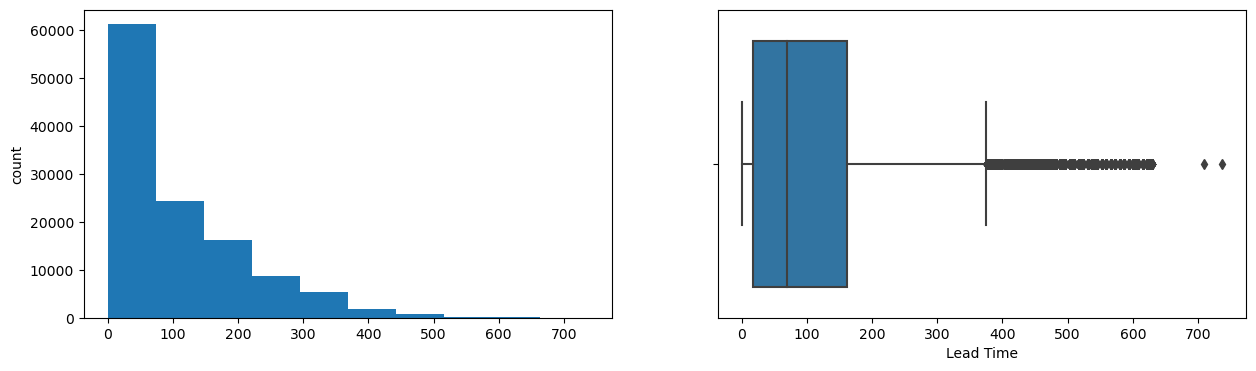

Nights
Skew : 3.13


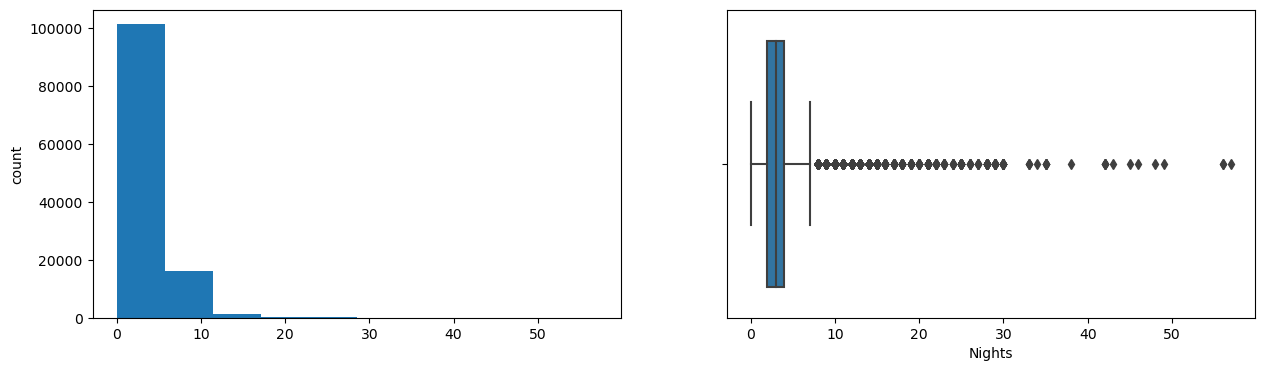

Guests
Skew : 10.21


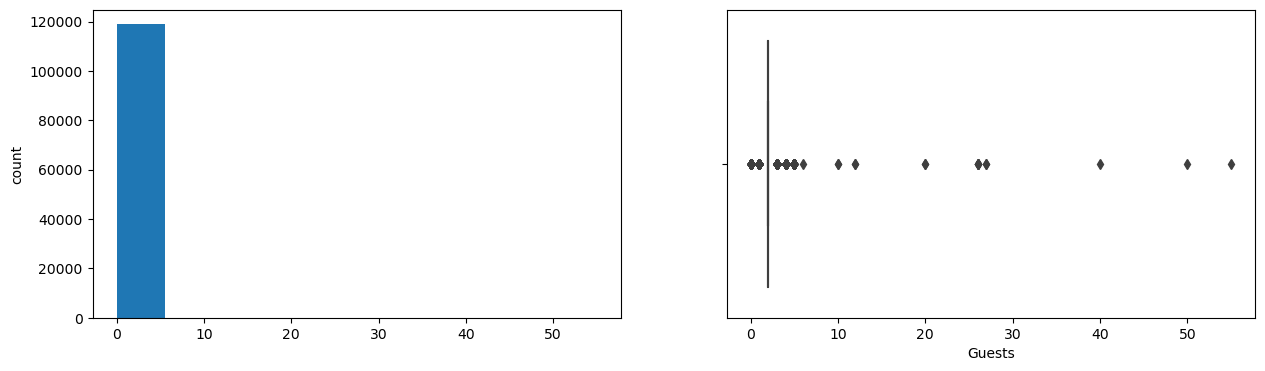

Avg Daily Rate
Skew : 10.6


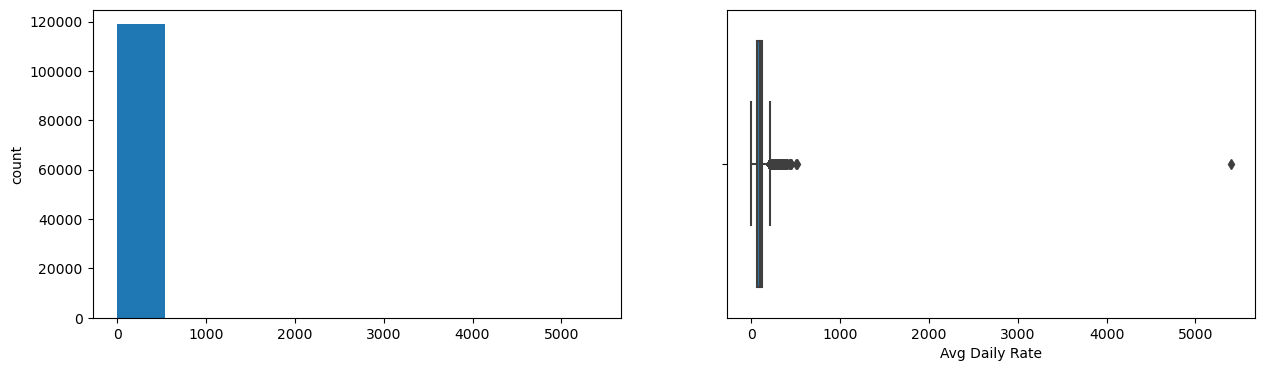

Cancelled (0/1)
Skew : 0.53


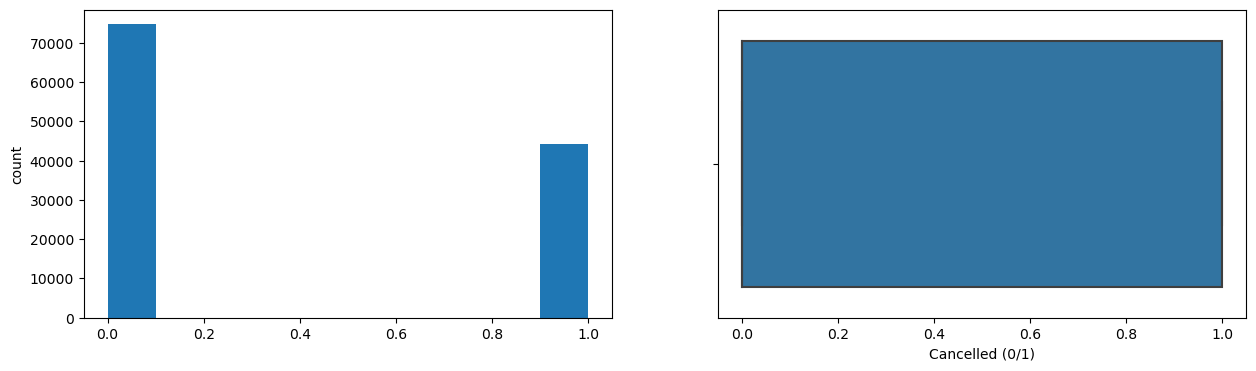

Revenue
Skew : 2.67


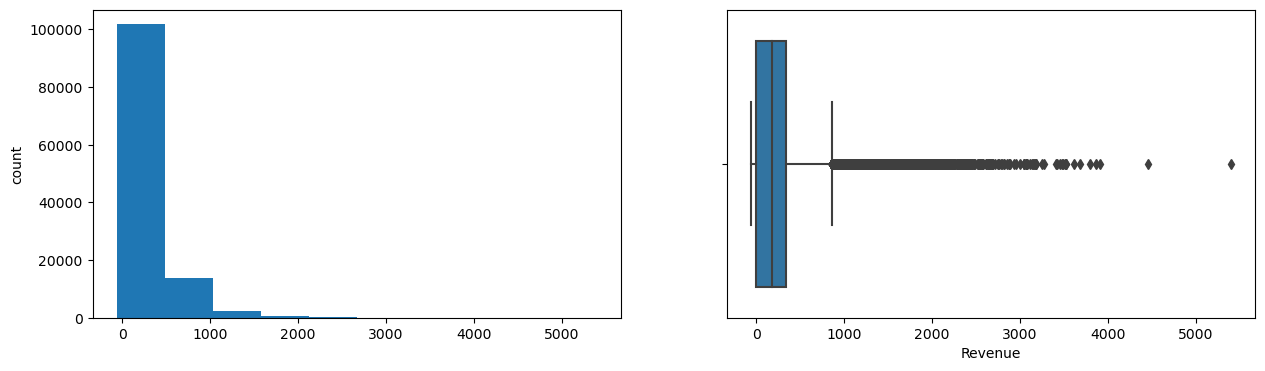

Revenue Loss
Skew : -4.38


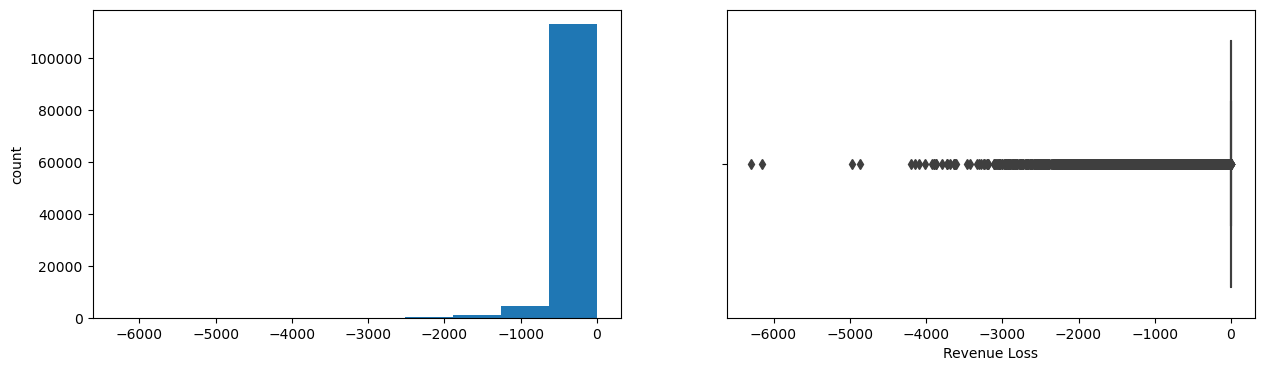

Booking Year
Skew : -0.17


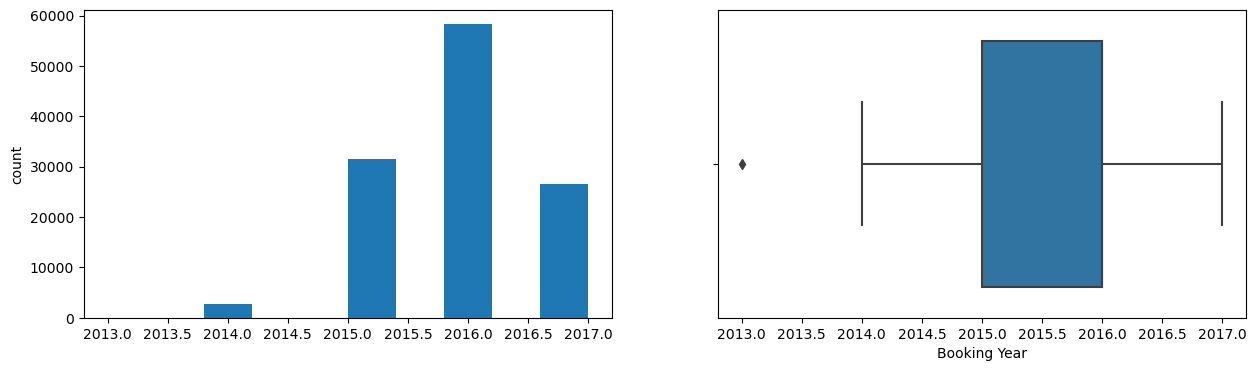

Booking Month
Skew : 0.09


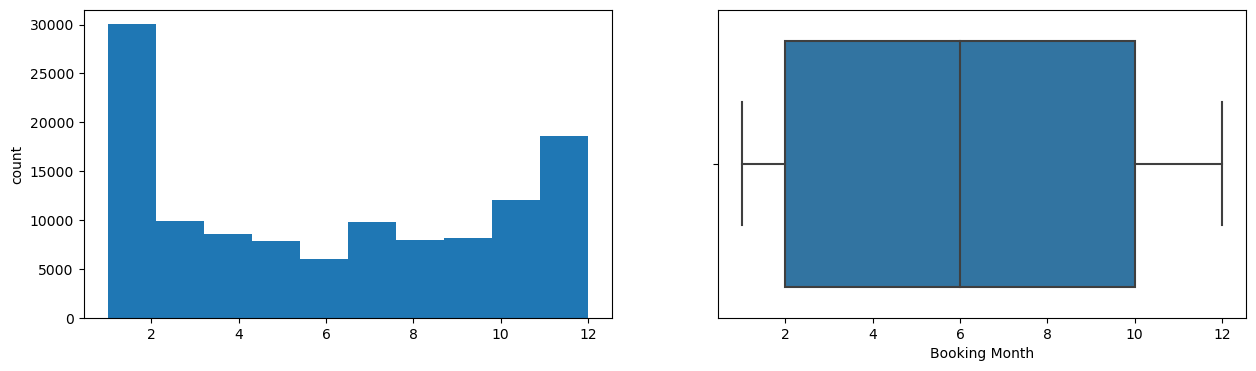

Booking Day
Skew : 0.08


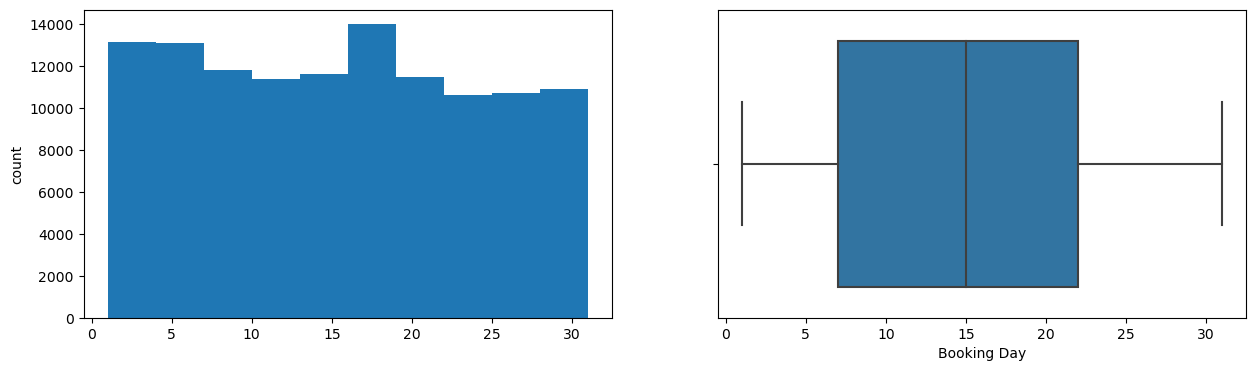

In [33]:
# checking for skewness and outliers in our numeric variable 

for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

# OBSERVATIONS

 - HIGHLY SKEWED(RIGHT) - Guests, Avg Daily Rate


 - HIGHLY SKEWED(LEFT) - None

 - SLIGHTLY SKEWED(RIGHT) - Lead Time, Nights, Revenue

 - SLIGHTLY SKEWED(LEFT) - Revenue Loss


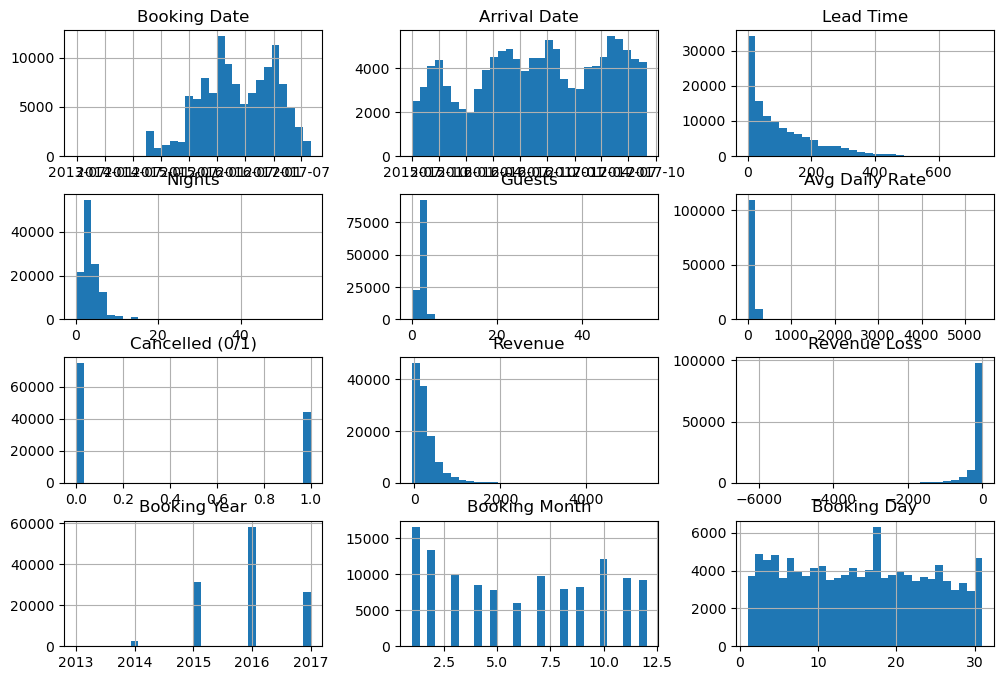

In [34]:
data.hist(bins = 30, figsize = (12, 8))
plt.show()

# OBSERVATIONS 

 - The Hotel has the highest booking in 2016 with about 50,900 bookings in the year.
 - The Hotel has a low level of cancellation, with almost 80,000 proceeds to about 45,000 cancellations .

In [80]:
fig, axes = plt.subplots(3, 2, figsize = (110, 110))
sns.set_style('whitegrid')
fig.suptitle('Bar plot for all categorical variables in the dataset')

ax1 = sns.countplot(ax = axes[0, 0], x = 'Hotel', data = data, palette = 'RdBu_r', 
              order = data['Hotel'].value_counts().head(10).index);
total = data['Hotel'].count()
ax1.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')

ax2 = sns.countplot(ax = axes[0, 1], x = 'Distribution Channel', data = data, palette = 'rainbow',
             order = data['Distribution Channel'].value_counts().head(10).index);
total = data['Distribution Channel'].count()
ax2.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')

ax3 = sns.countplot(ax = axes[1, 0], x = 'Customer Type', data = data, palette="Set1",
             order = data['Customer Type'].value_counts().head(10).index);
total = data['Customer Type'].count()
ax3.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')

ax4 = sns.countplot(ax = axes[1, 1], x = 'Country', data = data, palette="PuOr", 
              order = data['Country'].value_counts().head(10).index);
total = data['Country'].count()
ax4.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')

ax5 = sns.countplot(ax = axes[2, 0], x = 'Deposit Type', data = data, color = 'blue',
             order = data['Deposit Type'].value_counts().head(10).index);
total = data['Deposit Type'].count()
ax5.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')

ax6 =sns.countplot(ax = axes[2, 1], x = 'Status', data = data, palette="RdBu",
             order = data['Status'].value_counts().head(10).index);
total = data['Status'].count()
ax6.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')

axes[0][1].tick_params(labelrotation=18);
axes[1][1].tick_params(labelrotation=18);


plt.rc('font', size=100)
plt.rc('axes', titlesize=100)
plt.rc('axes', labelsize=100)
plt.rc('xtick', labelsize=100)
plt.rc('ytick', labelsize=100)

# OBSERVATION

 - 62.9% of total bookigas comes from the city hotel, making it the most used/booked hotel.
 - Travel Agents is the most sucessful Distribution Channel category, with 62.9% booking rate.
 - 36.1% of total ookings comes from Portugal, making it the successful booking country.


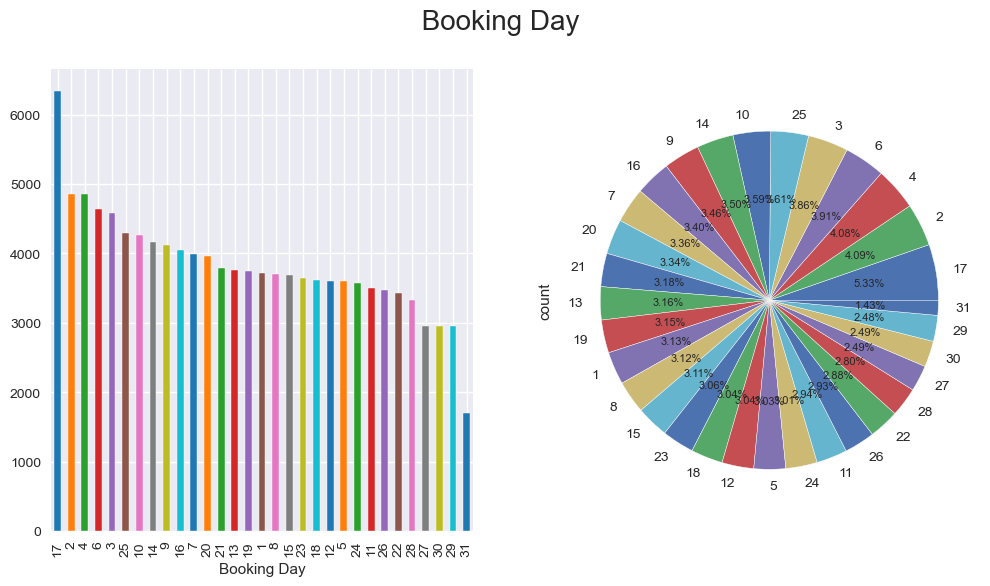

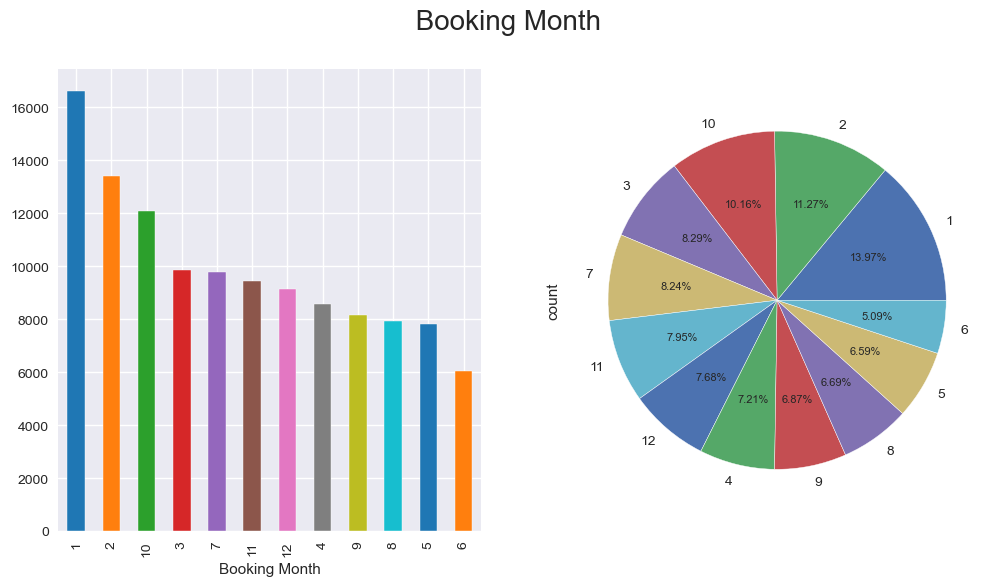

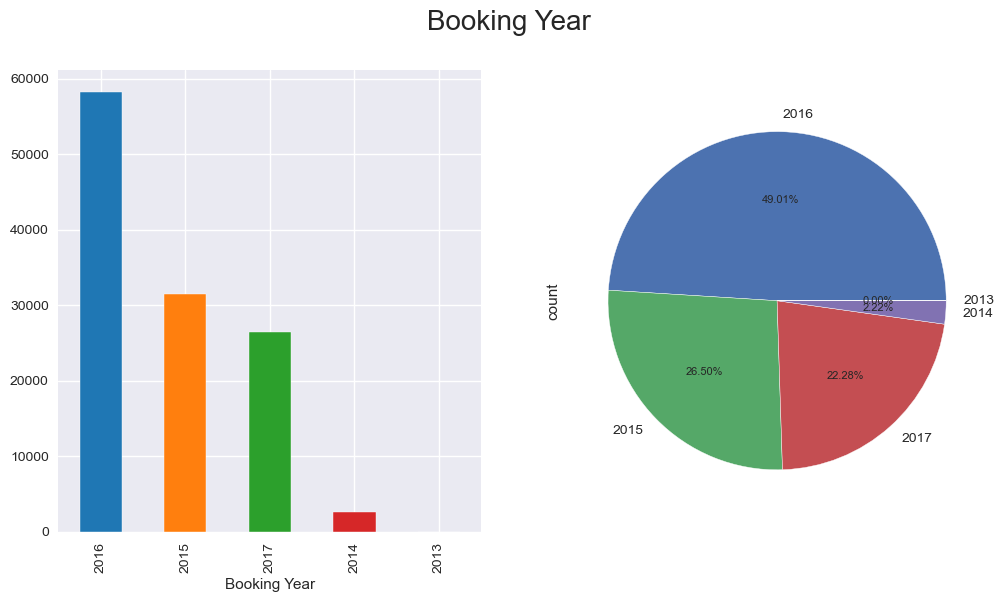

In [95]:
figsize = (120, 110)
cols = ['Booking Day', 'Booking Month', 'Booking Year']

for i in cols:
    if i == 'Booking Year':
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Set figsize here
        fig.suptitle('Booking Year', fontsize=20)
        plt.style.use('seaborn')
        plt.subplot(1, 2, 1)
        data['Booking Year'].value_counts().plot(kind='bar', color=sns.color_palette("tab10"))
        plt.subplot(1, 2, 2)
        data['Booking Year'].value_counts().plot(kind='pie', autopct="%.2f%%")
        plt.show()
    else:
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Set figsize here
        fig.suptitle(' ' + i + ' ', fontsize=20)
        plt.style.use('seaborn')
        plt.subplot(1, 2, 1)
        data[i].value_counts().plot(kind='bar', color=sns.color_palette("tab10"))
        plt.subplot(1, 2, 2)
        data[i].value_counts().plot(kind='pie', autopct="%.2f%%")
        plt.show()
        plt.rc('font', size=8)

# OBSERVATION 

 - Most Busy date - 17th
 - Most Busy Month - January
 - Most Busy Year - 2016

# BiVARIATE ANALYSIS

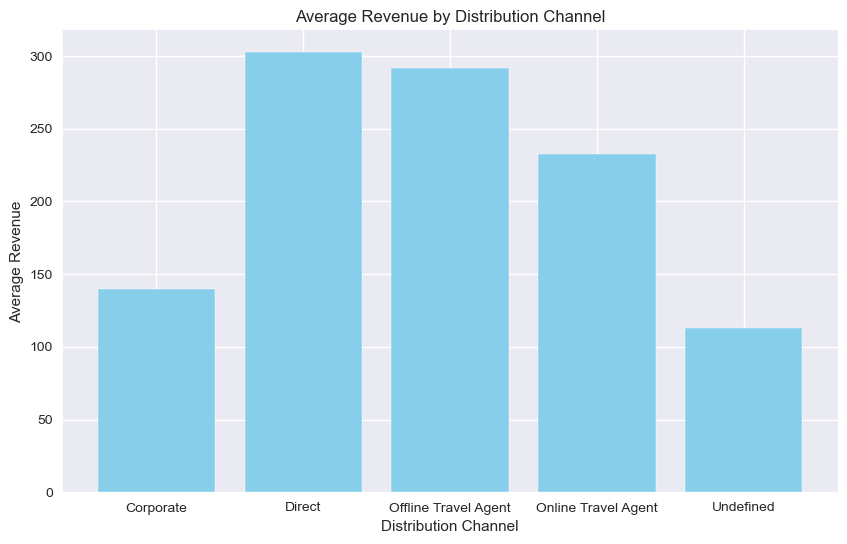

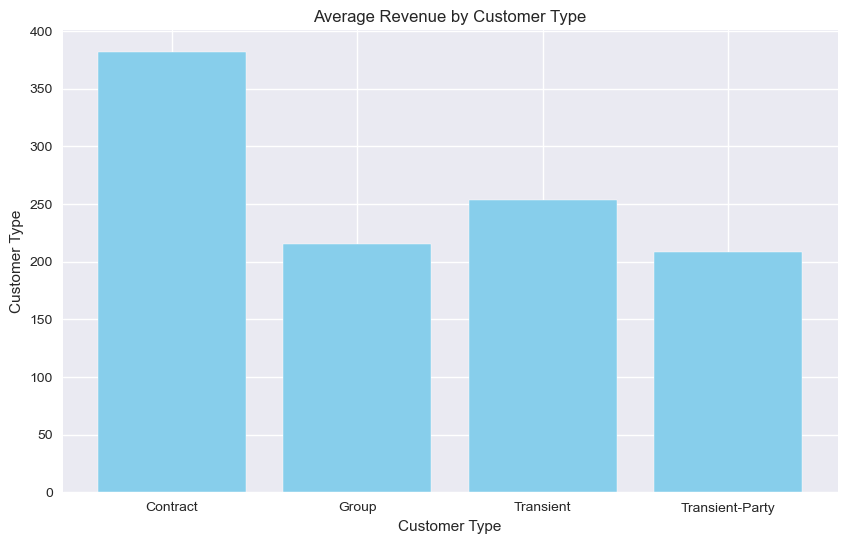

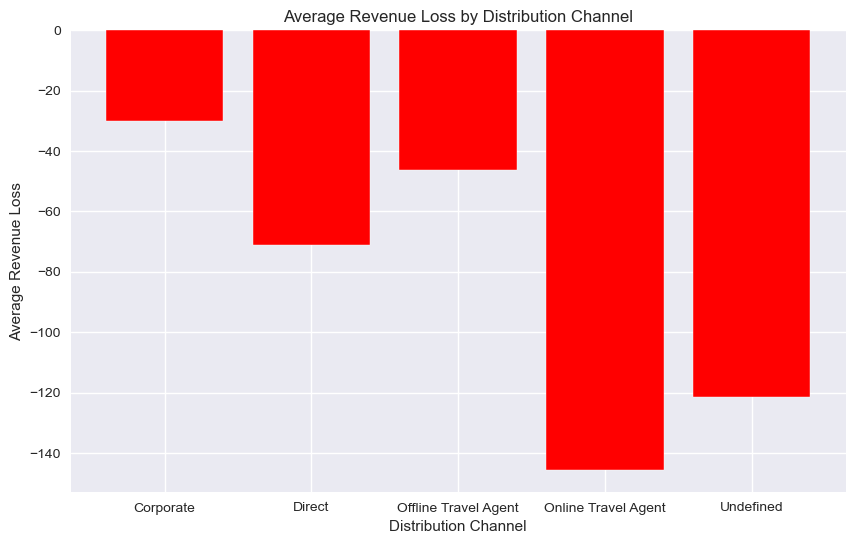

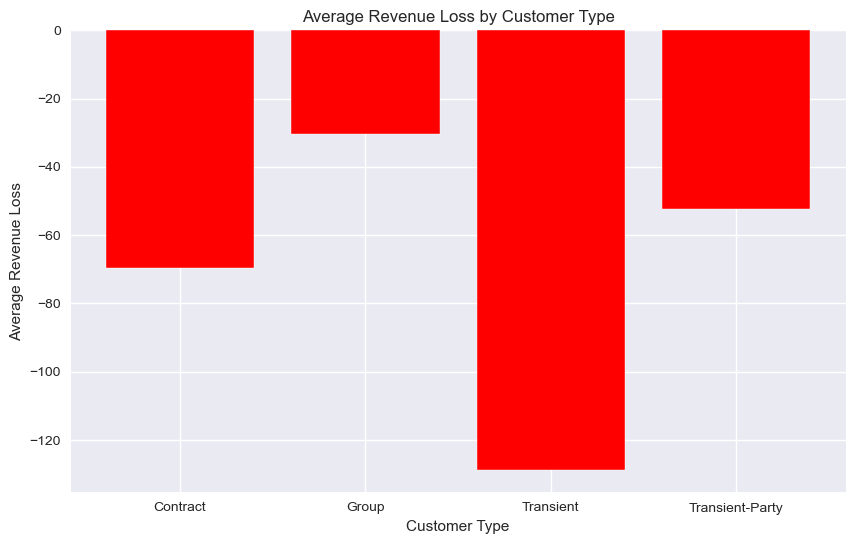

In [99]:
# Calculate average profit for each category
avg_profit = data.groupby('Distribution Channel')['Revenue'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(avg_profit['Distribution Channel'], avg_profit['Revenue'], color='skyblue')
plt.xlabel('Distribution Channel')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Distribution Channel')
plt.show()

# Calculate average profit for each category
avg_profit = data.groupby('Customer Type')['Revenue'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(avg_profit['Customer Type'], avg_profit['Revenue'], color='skyblue')
plt.xlabel('Customer Type')
plt.ylabel('Customer Type')
plt.title('Average Revenue by Customer Type')
plt.show()

# Calculate average profit for each category
avg_profit = data.groupby('Distribution Channel')['Revenue Loss'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(avg_profit['Distribution Channel'], avg_profit['Revenue Loss'], color='red')
plt.xlabel('Distribution Channel')
plt.ylabel('Average Revenue Loss')
plt.title('Average Revenue Loss by Distribution Channel')
plt.show()


# Calculate average profit for each category
avg_profit = data.groupby('Customer Type')['Revenue Loss'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(avg_profit['Customer Type'], avg_profit['Revenue Loss'], color='red')
plt.xlabel('Customer Type')
plt.ylabel('Average Revenue Loss')
plt.title('Average Revenue Loss by Customer Type')
plt.show()

# OBSERVATION

 - Direct customers has generated more revenue than other distribution channels.
 - Contract Customers has generated more average revenue amongst other Customer Type.
 - Most loss has come from online travel agents and Transients Customer type.

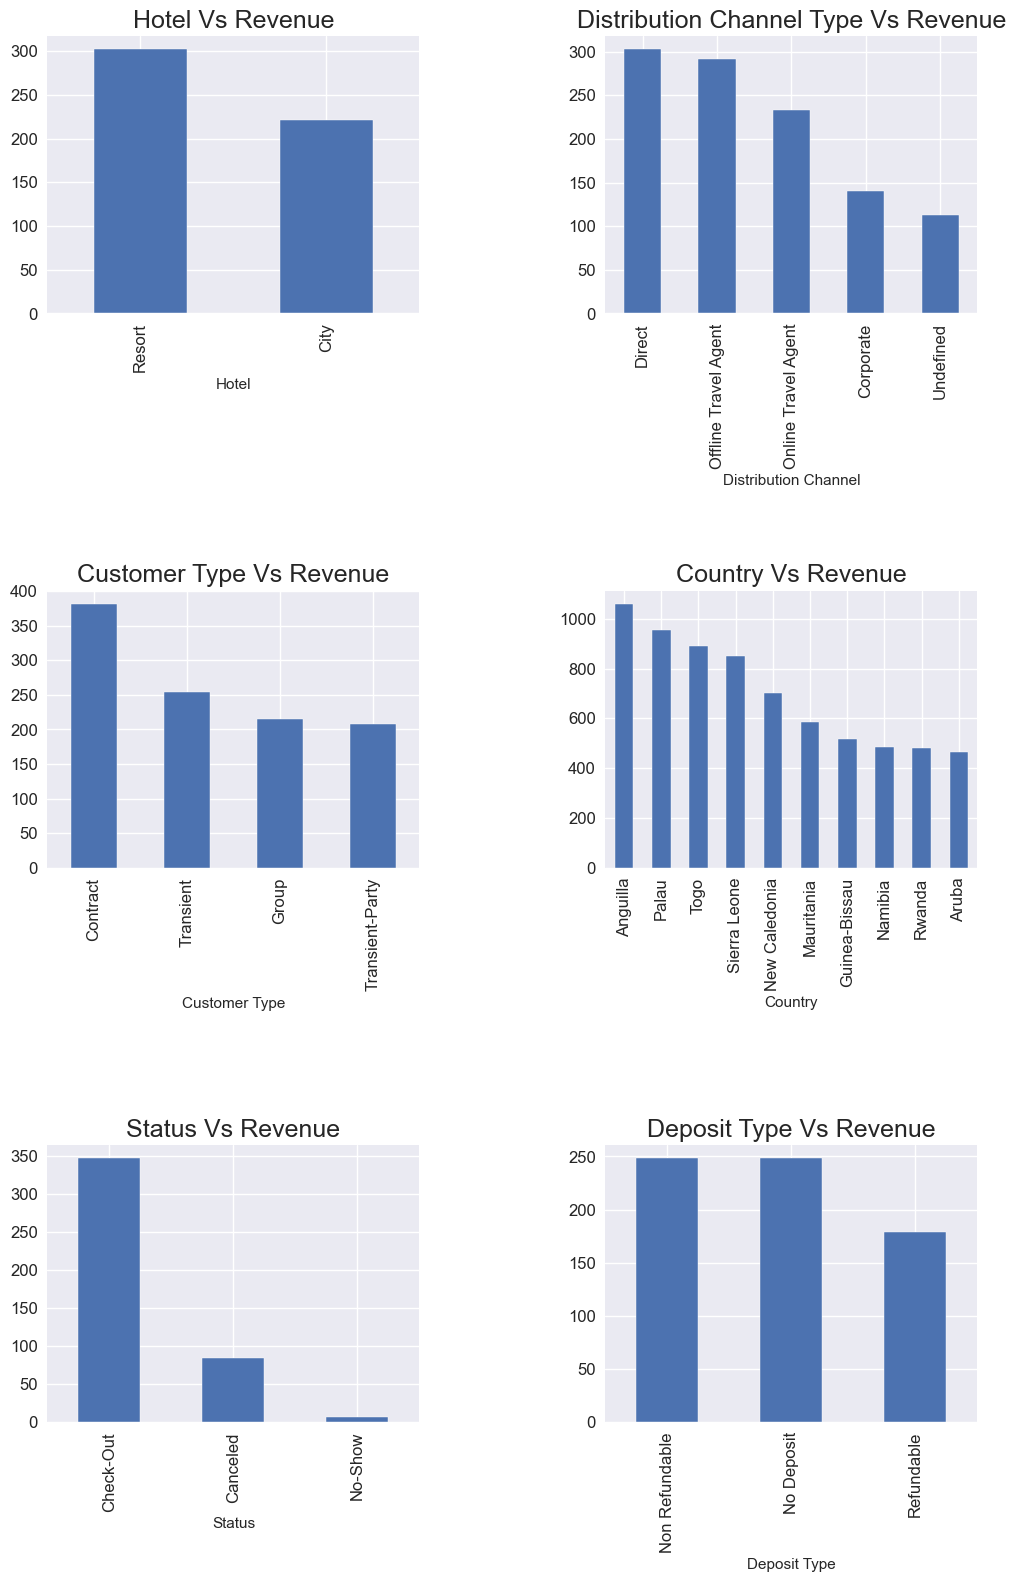

In [102]:
fig, axarr = plt.subplots(3, 2, figsize=(12, 18))
data.groupby('Hotel')['Revenue'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Hotel Vs Revenue", fontsize=18)
data.groupby('Distribution Channel')['Revenue'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Distribution Channel Type Vs Revenue", fontsize=18)
data.groupby('Customer Type')['Revenue'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Customer Type Vs Revenue", fontsize=18)
data.groupby('Country')['Revenue'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Country Vs Revenue", fontsize=18)
data.groupby('Status')['Revenue'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Status Vs Revenue", fontsize=18)
data.groupby('Deposit Type')['Revenue'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Deposit Type Vs Revenue", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

# OBSERVATION

 - Resort hotel brings more revenue than City Hotel.
 - Coperate distribution Channel generates 2nd to the last revenue for the Org,
 - Non-refundable deposit type generates as much revenue as No deposit type.


# MULTIVARIATE ANALYSIS

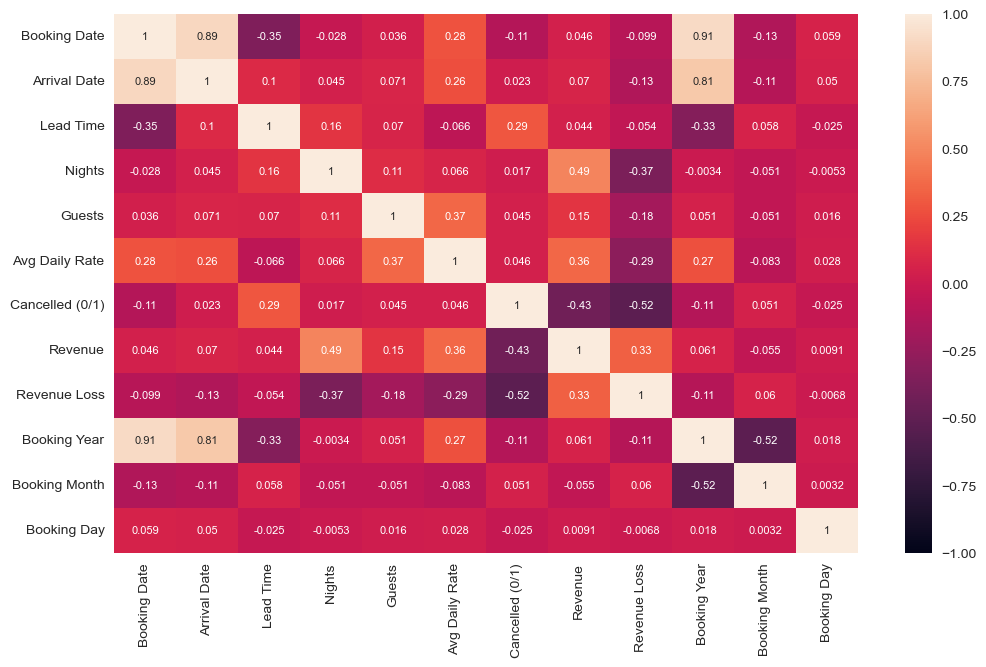

In [104]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Hotel', 'Distribution Channel', 'Customer Type', 'Country',
       'Deposit Type', 'Status'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [109]:
data['Guests'].corr(data['Lead Time'])

0.0695464145342213

In [110]:
data['Lead Time'].corr(data['Revenue'])

0.04423990709683075

In [111]:
data['Lead Time'].corr(data['Revenue Loss'])

-0.05441230372064236

# OBSERVATION

 - No. Of guests has no correlation with lead Time
 - Lead Time has no correlation with Revenue generated nor Revenue loss
 - No. of night has a slight positive correlation with revenue.
 - Cancellation has an Average Negative correlation with revenue.


In [ ]:
 # ANALYSIS BY OLUWADAMILARE TOBILOBA